Code to test the functionality of smoothdata.py and missingdata.py

Takes a table of real values and randomly removes entries.
Compare original values with smooth (from full set and from edited one) and interpolated functions.

Python packages needed:
seaborn (can be safely removed, is just used for better graphs)
matplotlib
csv

------------------------
Import libraries (ignore openpyxl warning if it appears. It's a known Panda's v0.14.0 bug):

In [1]:
import csv
import copy
try: 
    import seaborn as sb
except:
    pass
import matplotlib.pyplot as plt
import numpy as np
from missingdata import fill_missingdata
from collections import defaultdict
from numpy.random import random_integers
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas-0.14.0-py2.7-linux-x86_64.egg/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


Load sample data and extract relevant information:

In [2]:
fin = csv.DictReader(open('sampledata/dadosAPS_201517.csv', 'r'), delimiter=',')
tmin = defaultdict(list)
emptyvals = ['NA','na',
             'Null','null',
             'none','None',None]
for row in fin:
    ap = row['APS']
    if ap not in tmin: count = 0
    y = row['tmin']
    if y not in emptyvals: y = float(y)
    tmin[ap].append((count,y))
    count += 1
for k,v in tmin.items():
    print k, len(v)

AP3.1 278
AP3.3 278
AP3.2 278
AP5.3 278
AP5.2 278
AP5.1 278
AP1 278
AP4 278
AP2.1 278
AP2.2 278


Obtain smooth function for each AP, from the original data:

In [3]:
smooth_original = {}
tmin2plot = {}
for k,v in tmin.items():
    smooth_original[k] = {'x':[], 'y':[]}
    tmin2plot[k] = {'x':[], 'y':[]}
    xy, x, y = fill_missingdata(v,3)
    for i in range(len(x)):
        smooth_original[k]['x'].append(x[i])
        smooth_original[k]['y'].append(y[i])
    for i in range(len(v)):
        tmin2plot[k]['x'].append(v[i][0])
        tmin2plot[k]['y'].append(v[i][1])

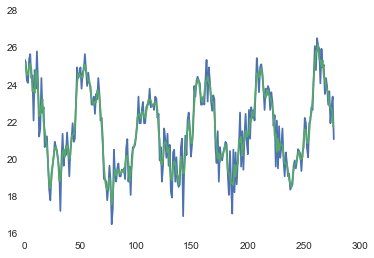

In [4]:
plt.close()
k = 'AP1'
plt.plot(tmin2plot[k]['x'], tmin2plot[k]['y'], label='Original data')
plt.plot(smooth_original[k]['x'], smooth_original[k]['y'], label='Smoothed data')

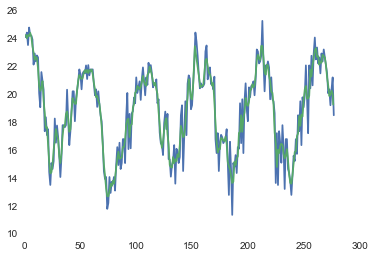

In [5]:
plt.clf()
k = 'AP5.1'
plt.plot(tmin2plot[k]['x'], tmin2plot[k]['y'], label='Original data')
plt.plot(smooth_original[k]['x'], smooth_original[k]['y'], label='Smoothed data')

In [14]:
tmin_sampled = copy.deepcopy(tmin)
smooth_sampled = {2:{}, 3:{}, 4:{}, 5:{}, 6:{}, 7:{}}
interpol_sampled = {2:{}, 3:{}, 4:{}, 5:{}, 6:{}, 7:{}}
r = {}
for k, v in tmin.items():
    s = len(v)
    r[k] = random_integers(0, s-1, size=int(0.2*s))
    print k,r[k]
    for i in r[k]:
        tmin_sampled[k][i] = (v[i][0],'NA')
    
    for w in range(2,8):
        smooth_sampled[w][k] = {'x':[], 'y':[]}
        interpol_sampled[w][k] = {'x':[], 'y':[]}
        xy, x, y = fill_missingdata(tmin_sampled[k],w)
        for i in range(len(x)):
            smooth_sampled[w][k]['x'].append(x[i])
            smooth_sampled[w][k]['y'].append(y[i])
        for i in range(len(xy)):
            interpol_sampled[w][k]['x'].append(xy[i][0])
            interpol_sampled[w][k]['y'].append(xy[i][1])

AP3.1 [  2 213 189  17  67 207 225   9 149 244 247 100  58 109 169 225 189 189
 212 223  20  71 225  60 255 247 197 269 103 227 185 160   9  88 185 139
 121  81 100 178 135  66 171 149 143 276  63 117  49  54  29 105  37 218
  74]
AP3.3 [254 236 121 264   3 186  50  96 178 226 187  52 208 154  61  59 214 183
 220 211 263 211 245  70 230  23 208 226  18 112 180 126 254  78 146  42
  45  22 159  70 194  98 139 198 187  12 260  59   1 274 257 209 275 226
 187]
AP3.2 [271 131 237 227 190 199 249 192  92 193 145  49 145 159 257 211 138  98
   5  28 179  41 125 136 125  54  74 166 250 171  76 250  22 125 197 246
 167 107  43  63  85 148 237 141  70 268 275 106 188 158  40 107 126 276
  31]
AP5.3 [ 56 232  69 138 200 228  28 187  45  67  79 106 224 124 184 200 169  77
 273 154 165  98  83 105 105 222   2 146 193  38 226 137 263 233  37 251
   9  59 254  54 255 197  52  33 232 212 171 263 186 209 225  11  76 155
 161]
AP5.2 [241  34 237 108  98 216 133 167  44 161 212 113  93  84 271  94 265  

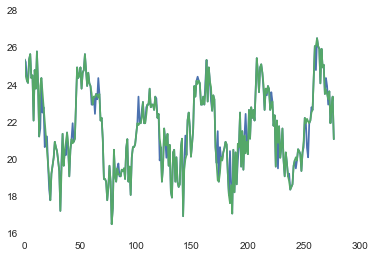

In [7]:
plt.close()
k = 'AP1'
plt.plot(tmin2plot[k]['x'], tmin2plot[k]['y'], label='Original data')

plt.plot(interpol_sampled[3][k]['x'], interpol_sampled[3][k]['y'], label='Interpolated data')

In [13]:
for k, v in tmin.items():
    var_orig = []
    for i in range(len(v)-1):
        var_orig.append(abs(v[i][1]-v[i+1][1]))
    p5, median, p95 = np.percentile(var_orig, [5, 50, 95])
    print k
    print 'p5, Median, p95'
    print p5,median,p95

    for w in interpol_sampled:
        var_estimate = []
        for i in r[k]:
            yorig = v[i][1]
            yest = interpol_sampled[w][k]['y'][i]
            var_estimate.append(abs(yorig-yest))
        yout = sum([(y<p5) or (y>p95) for y in var_estimate])
        print 'Window = ',w
        print 'Estimates with error outside p5 or p95, and corresponding percentage of total estimated values'
        print yout, yout*100./len(r[k])
        print ''

AP3.1
p5, Median, p95
0.142857142857 1.0 3.14285714286
Window =  2
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
9 16.3636363636

Window =  3
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
9 16.3636363636

Window =  4
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
9 16.3636363636

Window =  5
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
9 16.3636363636

Window =  6
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
9 16.3636363636

Window =  7
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
9 16.3636363636

AP3.3
p5, Median, p95
0.142857142857 1.0 3.14285714286
Window =  2
Estimates with error outside p5 or p95, and corresponding percentage of total estimated values
7 12.7272727273

Window =  3
Estimates 